In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Plot Funkton

In [2]:
def new_plot(settings):
    if settings != None and settings != {}:
        

        if "figsize" in settings:
            figsize_multiplier = settings["figsize"]
        else:
            figsize_multiplier = 1

        if "axis" in settings and "subplots" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif "axis" in settings and not("subplots" in settings):
            fig, axs = plt.subplots( figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif not("axis" in settings) and "subplots" in settings and not("figsize" in settings):
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"])
        elif not("axis" in settings) and "subplots" in settings and "figsize" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=(figsize_multiplier,figsize_multiplier))    
        elif not("axis" in settings) and not("subplots" in settings) and "figsize" in settings:
            fig, axs = plt.subplots(figsize=(figsize_multiplier,figsize_multiplier))
        else:
            fig, axs = plt.subplots()
 
        if(np.size(axs) == 1):
            axs = [axs]

        for ax in axs:
        #Achsen Skala
            if "lock_axis" in settings and settings["lock_axis"] and "axis" in settings:
                ax.axis([settings["axis"]["x"][0],settings["axis"]["x"][1],settings["axis"]["y"][0],settings["axis"]["y"][1]])

            #Achsen Beschriftunge
            if "axis_label_steps" in settings and "axis" in settings:
                ax.set_xticks( np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["axis_label_steps"]["x"]))
                ax.set_yticks( np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["axis_label_steps"]["y"]))
            

            #Gitter
            if "grid" in settings:
                if "axis" in settings and "minor_steps" in settings["grid"]:
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["grid"]["minor_steps"]["x"]),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["grid"]["minor_steps"]["y"]),minor=True)

                elif "axis" in settings and not("minor_steps" in settings["grid"]):
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1),minor=True)
                    
                else:
                    ax.minorticks_on()

                ax.grid(which='minor', alpha=settings["grid"]["minor_alpha"])
                ax.grid(which='major', alpha=settings["grid"]["major_alpha"])

            #Achsen Verhältings
            if "aspect" in settings:
                ax.set_aspect(settings["aspect"])

        if(np.size(axs) == 1):
            axs = axs[0]

    else:
        fig, axs = plt.subplots()
    
    return fig, axs

In [3]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot
 
    if np.size(ax) > 1:
        for i in range(0, np.size(ax)):
            ax[i].plot(x[i], y[i], color[i])
    else:
        ax.plot(x, y, color)
    
    return fig, ax

### Beispiel:

In [4]:
beispiel_settings = {
    "axis":{
        "x": (-20,20),
        "y": (-2,2)
    },
    "subplots":{
        "rows": 1,
        "cols": 1
    },
    "axis_label_steps":{
        "x": 2,
        "y": 2,
    },
    "lock_axis": True,
    "figsize": 1,
    "aspect": 'equal',
    "grid":{
        "minor_alpha": 0.5,
        "major_alpha": 0.8,
        "minor_steps":{
            "x": 1,
            "y": 1
        }
    }
}

In [5]:
subplots_settings = {
    "axis":{
        "x": (-20,20),
        "y": (-2,2)
    },
    "subplots":{
        "rows": 2,
        "cols": 1
    },
    "axis_label_steps":{
        "x": 2,
        "y": 2,
    },
    "lock_axis": True,
    "figsize": 1,
    "aspect": 'equal',
    "grid":{
        "minor_alpha": 0.5,
        "major_alpha": 0.8,
        "minor_steps":{
            "x": 1,
            "y": 1
        }
    }
}

In [6]:
only_Grid={
    "grid":{
        "minor_alpha": 0.5,
        "major_alpha": 0.8,
        "minor_steps":{
            "x": 1,
            "y": 1
        }
    }
}

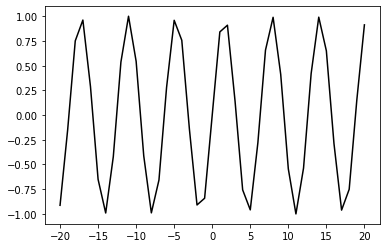

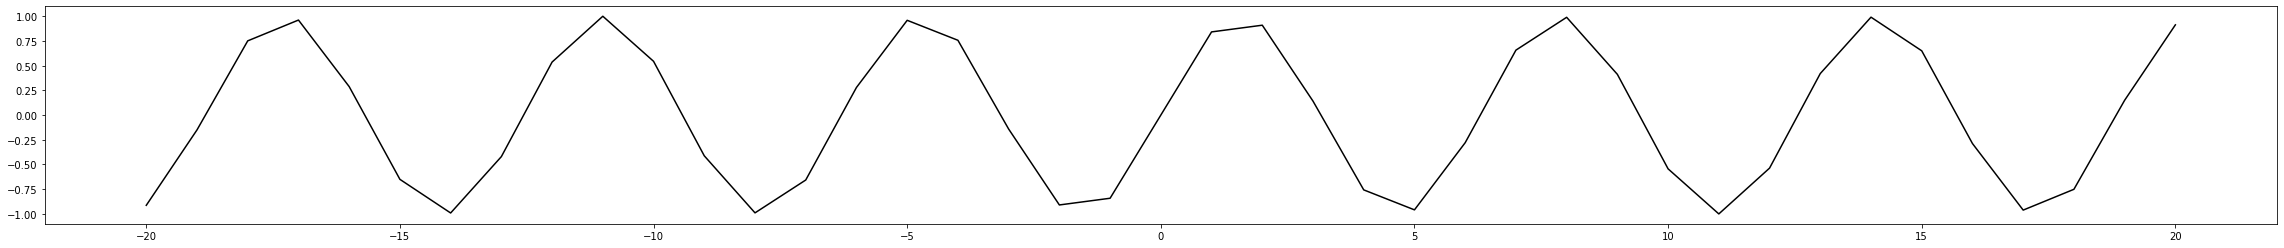

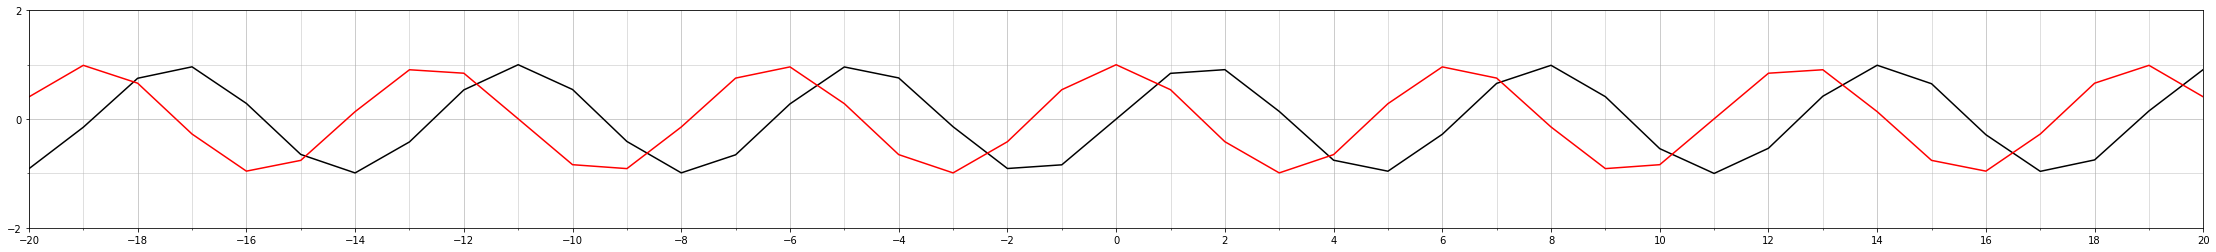

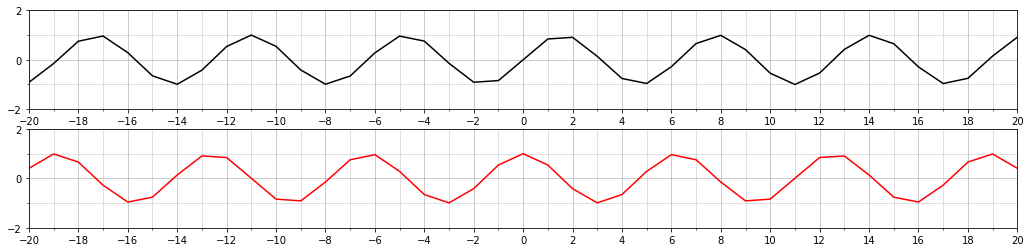

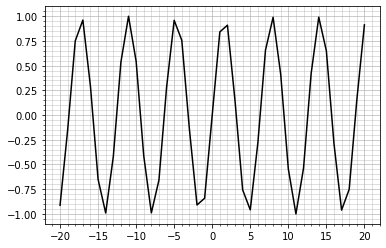

In [7]:
x = np.arange(-20,20+1)
y = np.sin(x)

#print(len([x]))

fig, ax = draw_plot(x, y, 'k')

fig, ax = draw_plot(x, y, 'k', {"axis":{"x": (-20,20), "y": (-2,2)}})

fig, ax = draw_plot(x, y, 'k', beispiel_settings)
fig, ax = draw_plot(x, np.cos(x), 'r', subplot=(fig, ax))

fig, ax = draw_plot((x, x), (y, np.cos(x)), ('k', 'r'), subplots_settings)

fig, ax = draw_plot(x, y, 'k', only_Grid)

# Circle Funkton

In [8]:
def circle(radius, offset, resolution):
    x_offset, y_offset = offset
    t = np.linspace(0, 2*np.pi, resolution)   

    x = x_offset + radius * np.cos(t)
    y = y_offset + radius * np.sin(t)

    x = np.append(x, np.nan)
    y = np.append(y, np.nan)
    return x,y

### Beispiel

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

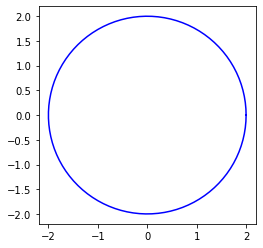

In [9]:
x, y = circle(2, (0,0), 100)

draw_plot(x, y, 'b', {"aspect": 'equal'})

# Polinom Interpolation

## mit Vandermonde-Matrix

In [10]:
def polynominterpolation_VmM(points):
    X = [] # Vandermonde-Matrix
    f = [] # Funktionswerte

    # Generiren der Vandermonde-Matrix und Funktionswerte aus übergeben Punkten
    for  x, y in points:
        X_row = [1, x] #X_row ist eine Zeile der Vandermonde-Matrix
        for i in range(2, len(points)):  #
            X_row.append(np.power(x, i)) # [1, x, ..., x^(n-1)], n: Anzahl der Punkte(len(points))

        X.append(X_row)
        f.append(y)

    a = np.linalg.solve(X,f) # Bestimen der Koeffizienten

    return a

### Beispile:

In [11]:
def curve_through(points, resolution = 1):

    # Polynominterpolation mit Vandermonde-Matrix
    # Ergebnis ist ein Polinom n-Grades wo n der Anzahl von punkten entspricht
    a = polynominterpolation_VmM(points)# a: Koeffizienten des Polinom durch die Punkte

    #x = sorted(x)
    #x = np.linspace(x[0], x[-1], resolution)

    #Den kleinsten x- und grösten x-Wert nemen (es wird erwartet das die punkt entlang der x-Achse sortitrt sind)
    x_out = np.arange(points[0][0], points[-1][0]+resolution, resolution)# x_out Lister aller x zwischen kleinsten x- und grösten x-Wert mit der Schrittweite 1
    y_out = []

    # x in das Polynom einsetzen
    for x in x_out:
        y = a[0] + a[1]*x            # ----|
        for i in range(2,a.size):    #    \/
           y += a[i] * np.power(x, i)# a0 + a1*x + ... + an*x^n  , n: Anzal der Koeffizienten(a.size)
        
        y_out.append(y)

    x_out = np.append(x_out, np.nan)
    y_out = np.append(y_out, np.nan)
    return x_out, y_out

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

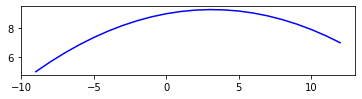

In [12]:
x, y = curve_through([(-9,5), (0,9), (12,7)])

draw_plot(x, y, 'b', {"aspect": 'equal'})

# Rotate Funktion

In [13]:
def rotate(x, y, degree, offset=(0,0) ):
    x_offset, y_offset = offset
    
    rad = degree*(np.pi/180)# np.cos und np.sin benötigen Rad statt Grad
    
    ##Im Uhrzeigersinn um offset rotiren mit Verschibung zum offset und wider zurück
    x_out = x_offset + np.cos(rad) * (x - x_offset) +  np.sin(rad) * (y - y_offset)
    y_out = y_offset - np.sin(rad) * (x - x_offset) +  np.cos(rad) * (y - y_offset)

    return x_out, y_out

### Beispiel

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

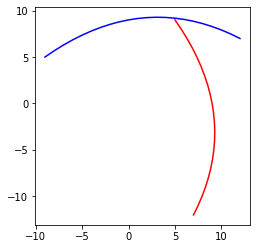

In [14]:
x_r, y_r = rotate(x, y, 90)

subplot = draw_plot(x, y, 'b', {"aspect": 'equal'})
draw_plot(x_r, y_r, 'r-', subplot=subplot)

# Differenzialgleichungen

## Symbolisch

### Beispiel:

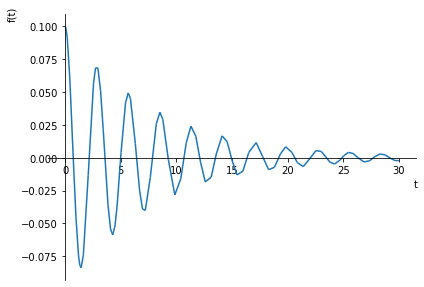

In [15]:
# Erdbeschleunigung [m/s^2] 
g = 9.81 
# Masse [kg]
m = 100.0
# Länge des Pendels [m]
l = 2.0
# Reibung [kg/s]
k = 25.0

# Anfangsauslenkung
phi_0 = 0.1
# Anfangsgeschwindigkeit
dotphi_0 = 0.0

# Zeitintervall
t0, t1 = 0.0, 30.0


t =  Symbol('t')
phi = Function('phi')(t)

phip = Derivative(phi)
phipp = Derivative(phip)

ode = Eq(m * l * phipp + k * l * phip + m * g * phi, 0)

initconds = {phi.subs(t, 0): phi_0, phip.subs(t, 0): dotphi_0}


solf = dsolve(ode , ics=initconds)

#print(latex(solf))
plot (solf.rhs, (t, t0, t1))

## Polygonzugverfahren von Euler

In [16]:
def euler(t0, t1, h, x0, funktion):
    t = np.arange(t0,t1+h,h)
    n = np.size(t)# Anzahl an t
    o = np.size(x0)# 
    x = np.zeros([o,n])# Array mit Nullen mit der selben Grösse wie t

    x[:,0] = x0
    for k in range(n-1):
        x[:, k+1] = x[:,k] + h * funktion(t[k],x[:,k])
    
    if o <= 1:
        x = x[0]

    return t, x

### Beispiel:

In [17]:
def swingBoatOde(t,z):
    # Erdbeschleunigung [m/s^2] 
    g = 9.81 
    # Masse [kg]
    m = 100.0
    # Länge des Pendels [m]
    l = 2.0
    # Reibung [kg/s]
    k = 25.0

    zp = np.array( [z[1], ( -k/m*l ) * z[1] - ( g/l*sin(z[0]) )] )
    #zp = np.array( [z[1], ( -k/m ) * z[1] - ( g/l*sin(z[0]) )] )

    return zp

In [18]:
# Anfangsauslenkung
phi_0 = 0.0
# Anfangsgeschwindigkeit
dotphi_0 = 5.0
z0 = np.array([phi_0, dotphi_0])

# Zeitintervall
t0, t1 = 0.0, 30.0

h = 0.01

t, z = euler(t0, t1, h, z0, swingBoatOde)

#### Multi Subplots

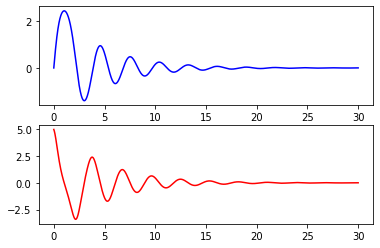

In [19]:
subplot = draw_plot((t,t), z, ('b', 'r'), {"subplots":{"rows": 2, "cols": 1}})

#### Phaserndiagram

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

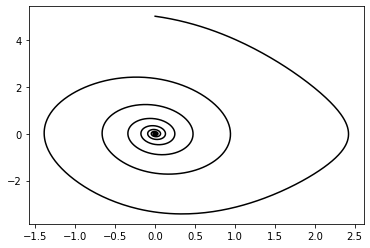

In [20]:
draw_plot(z[0], z[1], 'k')